Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [19]:
datas = pd.DataFrame(data)
datas.index = labels

**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [5]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [6]:
datas.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [7]:
datas[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [10]:
dts = datas[['animal','age']]
dts.loc[['d','e','i']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [12]:
datas[datas.visits > 3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [13]:
datas[datas.age.isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [15]:
datas[(datas.animal == 'cat') & (datas.age <3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [17]:
datas[(datas.age >=2) & (datas.age <=4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [20]:
datas.loc['f','age'] = 1.5
datas.loc['f']

animal      cat
age         1.5
visits        3
priority     no
Name: f, dtype: object

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [22]:
datas.visits.sum()

19

**12.** Calculate the mean age for each different animal in `df`.

In [23]:
datas.groupby('animal').agg({'age':'mean'})

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [25]:
dts = datas.append({'animal':'pig','age' : '4', 'visits': '3','priority': 'yes'}, ignore_index= True)

C:\Users\adars\AppData\Local\Temp\ipykernel_3580\3545096126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dts = datas.append({'animal':'pig','age' : '4', 'visits': '3','priority': 'yes'}, ignore_index= True)


In [26]:
dts

,animal,age,visits,priority
0,cat,2.5,1,yes
1,cat,3.0,3,yes
2,snake,0.5,2,no
3,dog,NaN,3,yes
4,dog,5.0,2,no
5,cat,1.5,3,no
6,snake,4.5,1,no
7,cat,NaN,1,yes
8,dog,7.0,2,no
9,dog,3.0,1,no


In [27]:
dts.drop(10)

,animal,age,visits,priority
0,cat,2.5,1,yes
1,cat,3.0,3,yes
2,snake,0.5,2,no
3,dog,NaN,3,yes
4,dog,5.0,2,no
5,cat,1.5,3,no
6,snake,4.5,1,no
7,cat,NaN,1,yes
8,dog,7.0,2,no
9,dog,3.0,1,no


**14.** Count the number of each type of animal in `df`.

In [28]:
datas.animal.value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [29]:
datas.sort_values(by = ['age', 'visits'], inplace = True, ascending= [False, True])

In [30]:
datas

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [32]:
datas.priority = datas.priority.map({'yes':'True','no':'False'})
datas

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,snake,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,1.5,3,False
c,snake,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [33]:
datas.animal = datas.animal.replace(['snake'],'python')

In [34]:
datas

,animal,age,visits,priority
i,dog,7.0,2,False
e,dog,5.0,2,False
g,python,4.5,1,False
j,dog,3.0,1,False
b,cat,3.0,3,True
a,cat,2.5,1,True
f,cat,1.5,3,False
c,python,0.5,2,False
h,cat,NaN,1,True
d,dog,NaN,3,True


**18.** Load the ny-flights dataset to Python

In [36]:
flight = pd.read_csv(r"C:\Logs\ny-flights.csv")

In [37]:
flight.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


**19.** Which airline ID is present maximum times in the dataset

In [59]:
flight.airline_id.value_counts()

20409    4902
19790    3803
20398    2434
19805    2427
20366    2080
19393    1917
20355    1568
19977    1106
21171     301
20437     206
20436      33
19690      29
20304      11
Name: airline_id, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

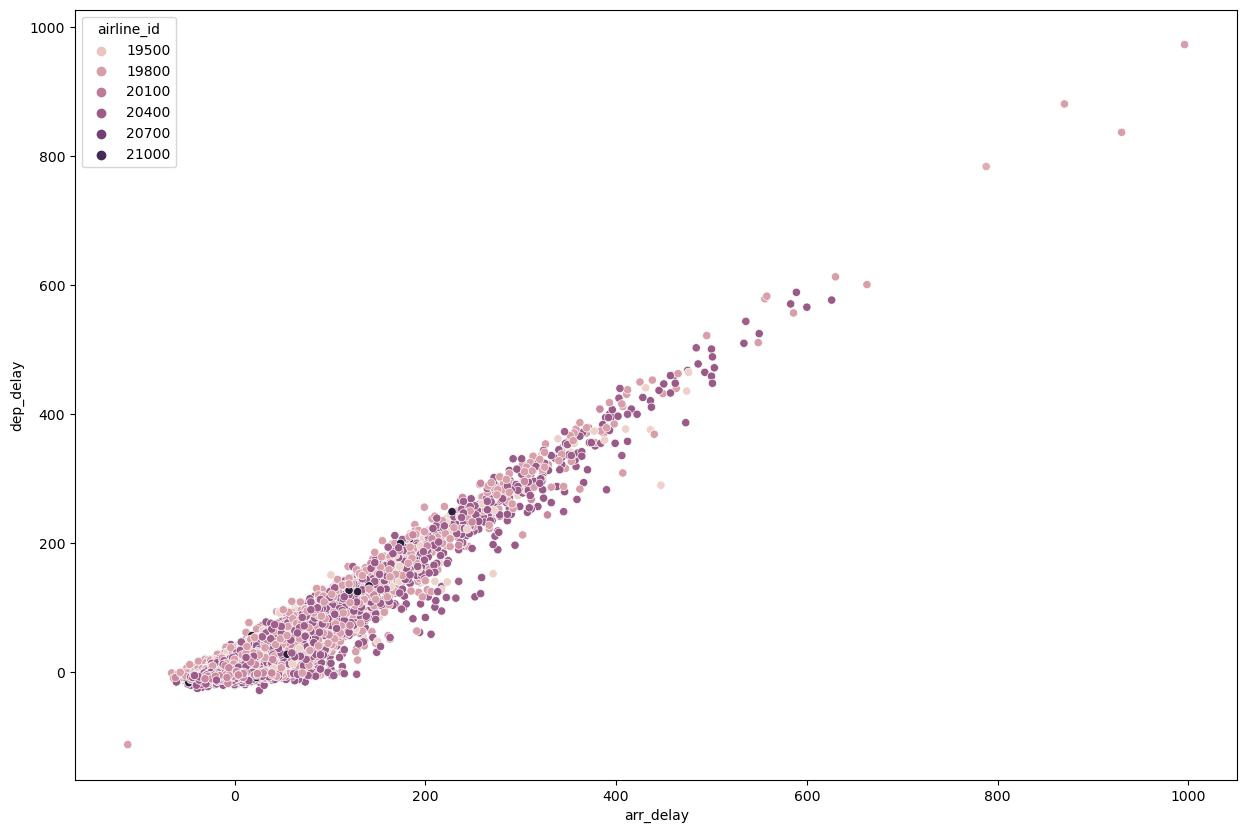

In [64]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = flight, y = 'dep_delay', x = 'arr_delay', hue = 'airline_id')
plt.show()